In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('/content/diabetes (2).csv')

In [3]:
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [4]:

# Part 1: Import Libraries & Load Dataset


# Data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix





Dataset shape: (768, 9)

Statistical Summary:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    

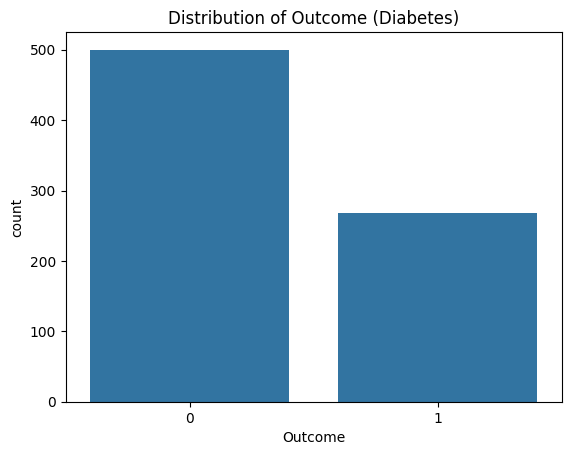

In [5]:

# Part 2: Data Exploration


# Shape of dataset
print("Dataset shape:", data.shape)

# Basic statistics
print("\nStatistical Summary:")
print(data.describe())

# Check missing values
print("\nMissing values (before handling zeros):")
print(data.isnull().sum())

# Distribution of target variable
sns.countplot(x="Outcome", data=data)
plt.title("Distribution of Outcome (Diabetes)")
plt.show()


In [6]:

# Part 3: Data Preprocessing


# Columns where 0 means missing values
cols_with_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Replace 0 with NaN
data[cols_with_missing] = data[cols_with_missing].replace(0, np.nan)

# Check missing values again
print("Missing values after replacing zeros:")
print(data.isnull().sum())

# Impute missing values using mean
imputer = SimpleImputer(strategy="mean")
data[cols_with_missing] = imputer.fit_transform(data[cols_with_missing])

# Feature-target split
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Missing values after replacing zeros:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [7]:

# Part 4: Apply Classification Models


models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    }

# Display results
pd.DataFrame(results).T


,Accuracy,Precision,Recall,F1-score
Logistic Regression,0.694805,0.577778,0.481481,0.525253
KNN,0.733766,0.618182,0.629630,0.623853
SVM,0.733766,0.644444,0.537037,0.585859
Decision Tree,0.681818,0.567568,0.388889,0.461538


In [8]:

# Part 5: Apply Ensemble Methods


ensemble_models = {
    "Random Forest": RandomForestClassifier(),
    "Bagging": BaggingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

for name, model in ensemble_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    }

# Display updated results
pd.DataFrame(results).T


,Accuracy,Precision,Recall,F1-score
Logistic Regression,0.694805,0.577778,0.481481,0.525253
KNN,0.733766,0.618182,0.629630,0.623853
SVM,0.733766,0.644444,0.537037,0.585859
Decision Tree,0.681818,0.567568,0.388889,0.461538
Random Forest,0.707792,0.588235,0.555556,0.571429
Bagging,0.720779,0.622222,0.518519,0.565657
AdaBoost,0.746753,0.659574,0.574074,0.613861
Gradient Boosting,0.766234,0.695652,0.592593,0.640000


Best Performing Model:
                   Accuracy  Precision    Recall  F1-score
Gradient Boosting  0.766234   0.695652  0.592593      0.64


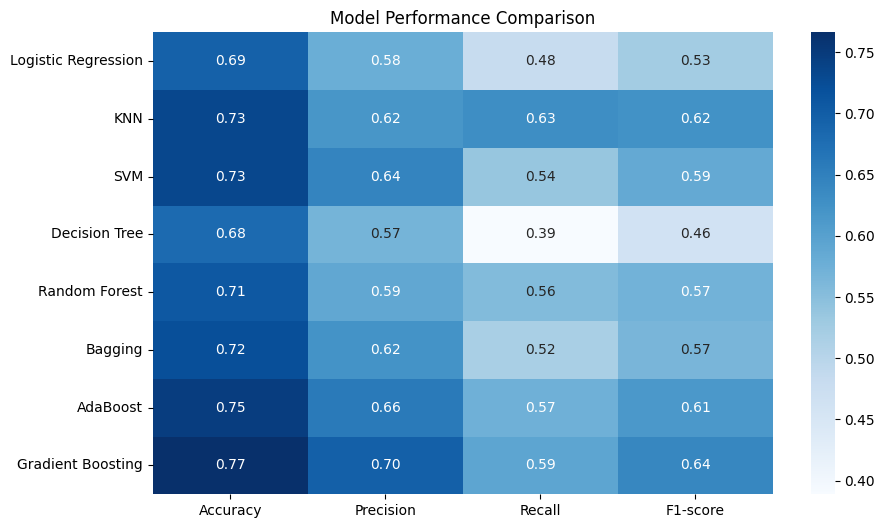

In [9]:

# Part 6: Evaluate & Identify Best Model


# Convert results into DataFrame
results_df = pd.DataFrame(results).T

# Sort by F1-score (balanced metric)
best_model = results_df.sort_values(by="F1-score", ascending=False).head(1)

print("Best Performing Model:")
print(best_model)

# Heatmap of performance
plt.figure(figsize=(10,6))
sns.heatmap(results_df, annot=True, fmt=".2f", cmap="Blues")
plt.title("Model Performance Comparison")
plt.show()
